# Statistics on card draws for a 52 deck of cards

For the purposes of this task, assign each card a value: The Ace takes a value of 1, numbered cards take the value printed on the card, and the Jack, Queen, and King each take a value of 10.

The file '30_card_draws' includes a list of 30 random draws of three cards from a deck of 52 cards.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
from array import array

### First, create a histogram depicting the relative frequencies of the card values

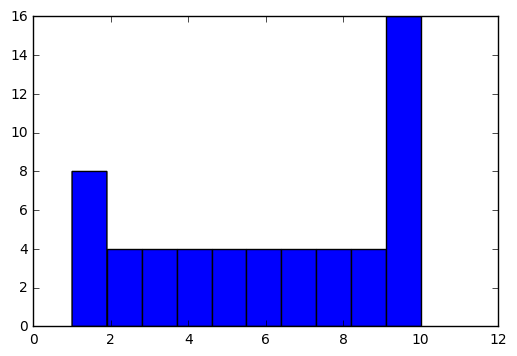


Mean is 6 

Median is 6.50


Standard deviation is 3.36 


In [16]:
card_values = np.array([1,1,1,1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10])

plt.hist(card_values)
plt.show()

print "\nMean is %i " % np.mean(card_values)
print "\nMedian is %.2f\n" % np.median(card_values)
print "\nStandard deviation is %.2f " % np.std(card_values)

### We will look at the statistics for the sum of scores when making three card draws. 

In each trial, cards will be drawn without replacement, meaning that in a single set of three, each card can appear at most once. After each trial, the cards that were drawn are shuffled back in the deck so that they could be drawn again in the following trial. This will be repeated 30 time.



In [2]:
#Read in file and create a list where each element is a set of 3 cards drawn
cards_drawn = []
with open('30_card_draws') as file:
    cards_drawn = [cards_drawn.strip() for cards_drawn in file]

#Get each card as an individual element
cards_list = []
for card_set in cards_drawn:
    cards_list.extend(card_set.split())
    
#Remove the suits to leave just the card values
cards_list = [ card[:-1] for card in cards_list]

#Change King,Queen and Jack cards to 10 and Ace cards to 1
for card in xrange(len(cards_list)):
    if cards_list[card] =="Q" or cards_list[card]=="K" or cards_list[card]=="J":
        cards_list[card] = "10"
    elif cards_list[card] == "A":
        cards_list[card] = "1"

#Change to a list of integers
cards_list = list(map(int,cards_list))

#Get Nested list of each draw
list_of_draws = [cards_list[i:i+3] for i in range(0, len(cards_list), 3)]

#List of sum for each 3 card draw
sum_of_draw = []
for draw in list_of_draws:
    for value in draw:
        summed_value = sum(int(value) for value in draw)
    sum_of_draw.append(summed_value)

In [3]:
#CALCULATE CENTRAL TENDENCIES - MEAN & MODE:
#Mean sum of 3 card draws
mean = (sum(int(i) for i in sum_of_draw))/30
#For median arrange sum_of_draws from smallest to greatest values
sorted_sum_of_draws = sorted(sum_of_draw)
#Since theres 30 values in order to get median get the mean of 15th & 16th numbers in list
median = (float(sorted_sum_of_draws[14]) + sorted_sum_of_draws[15])/2
#mode
mode = mode(sum_of_draw, axis=None)

In [4]:
#CALCULATE MEASURES OF VARIABILTY - STANDARD DEV & VARIANCE
#standard deviation
numpy_array_of_draws = np.array(sum_of_draw)
standard_dev = np.std(numpy_array_of_draws)
#variance
variance = np.var(numpy_array_of_draws)

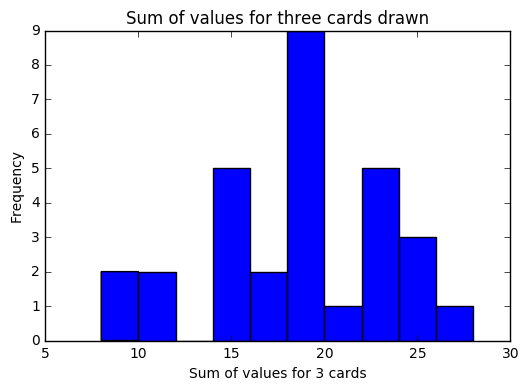

In [5]:
#Draw histogram of the card draws
plt.hist(numpy_array_of_draws)
plt.title("Sum of values for three cards drawn")
plt.ylabel("Frequency")
plt.xlabel("Sum of values for 3 cards")
plt.show()

In [6]:
print "The cards drawn were: ", cards_drawn
print "\nThe sum of the 30 draws are: ", sum_of_draw
print "\nMean is %i " % mean
print "\nMedian is %.2f\n" % median
print mode
print "\nStandard deviation is %.2f " % standard_dev
print "\nVariance is %.2f " % variance

The cards drawn were:  ['2h 3d Jd', '3s Ad Jh', '9h 6c 2c', '7s Kh As', 'Ah 4s 6d', 'Jd 8s Kd', '4c 4d 7d', '8c Jh 4h', 'Jd Jc 3h', '7d 8h 4s', '5c 10d Qs', 'Kd 8c 4d', '4d 9d Ac', '7s 3c Ad', '6s Jd 7s', '2d 7d Kc', '3h Jd 2h', '6s As 2d', 'Jc 6h 3h', '3h 7c 9h', '9d 4s 5s', '9d 5h 2s', 'Ac Ad 6s', 'Qs 2s 7h', 'Qh 4s 4c', 'Kd 9d 2c', '4h 10h 8s', 'Kh Jd 5h', '8s Jc As', '8c 6c Qc']

The sum of the 30 draws are:  [15, 14, 17, 18, 11, 28, 15, 22, 23, 19, 25, 22, 14, 11, 23, 19, 15, 9, 19, 19, 18, 16, 8, 19, 18, 21, 22, 25, 19, 24]

Mean is 18 

Median is 19.00

ModeResult(mode=array([19]), count=array([6]))

Standard deviation is 4.79 

Variance is 22.93 


### Compare the shape of the sampling distribution to that of the original distribution. 
**How are they different?**

The first graph is mostly flat until the value of 10 which is the predominant value that can be drawn. This is to be expected as it is possible to get a value of 10 from: The card "10", a jack, a King and a Queen from all four suits.

The second graph is close to a normal distribution. If the sampling size were increased it would conform closer to a normal distribution. This shape is expected from the **central limit theorem** which states that tha distribution of sample means is approximately normal. A normal distribution characteristically has a mean = mode = median which holds true for this case.

**Why are they different?**

The first graph shows the distribution of values in the **population** whereas thesecond graph shows the distribution of values for a **sample** of size 3. 


### Estimates about values you would get on future draws

#### Q: What range you would expect approximately 90% of your draw values to fall?
90% of all draw sums should fall between 10 and 26

#### Q: What is the approximate probability that you will get a draw value of at least 20?
Draws of at least 20 should occur with probability approximately 0.4